In [ ]:
import pandas as pd 

df= pd.read_csv(r"C:\Users\aswin\Downloads\FAOSTAT_data - FAOSTAT_data_en_12-29-2024.csv")

df.drop(["Year Code","Domain Code","Domain","Flag","Flag Description","Note"],axis=1)

df1=df.drop(["Year Code","Domain Code","Domain","Flag","Flag Description","Note"],axis=1)

df1["Unit"]="ha-kg/ha-t"

df1.fillna(0)

,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year,Unit,Value
0,4,Afghanistan,5312,Area harvested,1371,"Almonds, in shell",2019,ha-kg/ha-t,29203.00
1,4,Afghanistan,5412,Yield,1371,"Almonds, in shell",2019,ha-kg/ha-t,1308.30
2,4,Afghanistan,5510,Production,1371,"Almonds, in shell",2019,ha-kg/ha-t,38205.00
3,4,Afghanistan,5312,Area harvested,1371,"Almonds, in shell",2020,ha-kg/ha-t,22134.00
4,4,Afghanistan,5412,Yield,1371,"Almonds, in shell",2020,ha-kg/ha-t,1775.90
...,...,...,...,...,...,...,...,...,...
224642,716,Zimbabwe,5510,Production,22221.01,"Whole milk, evaporated",2019,ha-kg/ha-t,5010.21
224643,716,Zimbabwe,5510,Production,22221.01,"Whole milk, evaporated",2020,ha-kg/ha-t,4795.70
224644,716,Zimbabwe,5510,Production,22221.01,"Whole milk, evaporated",2021,ha-kg/ha-t,4921.05
224645,716,Zimbabwe,5510,Production,22221.01,"Whole milk, evaporated",2022,ha-kg/ha-t,4966.37


In [3]:
df1["Area harvested"]=df1["Value"].where(df1["Element"]=="Area harvested")
df1["Yield"]=df1["Value"].where(df1["Element"]=="Yield")
df1["Production"]=df1["Value"].where(df1["Element"]=="Production")
df2=df1.fillna(0)

In [4]:
# Group by 'Year' and 'Area' and propagate values in each group
df2[["Production", "Area harvested", "Yield"]] = (df2.groupby(["Year", "Area","Item"])[["Production", "Area harvested", "Yield"]]
 .transform(lambda group: group.ffill().bfill())
)


In [5]:
df2
df2.isnull().sum()
df2.dropna(axis=0)

,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year,Unit,Value,Area harvested,Yield,Production
0,4,Afghanistan,5312,Area harvested,1371,"Almonds, in shell",2019,ha-kg/ha-t,29203.00,29203.0,0.0,0.00
1,4,Afghanistan,5412,Yield,1371,"Almonds, in shell",2019,ha-kg/ha-t,1308.30,0.0,1308.3,0.00
2,4,Afghanistan,5510,Production,1371,"Almonds, in shell",2019,ha-kg/ha-t,38205.00,0.0,0.0,38205.00
3,4,Afghanistan,5312,Area harvested,1371,"Almonds, in shell",2020,ha-kg/ha-t,22134.00,22134.0,0.0,0.00
4,4,Afghanistan,5412,Yield,1371,"Almonds, in shell",2020,ha-kg/ha-t,1775.90,0.0,1775.9,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
224642,716,Zimbabwe,5510,Production,22221.01,"Whole milk, evaporated",2019,ha-kg/ha-t,5010.21,0.0,0.0,5010.21
224643,716,Zimbabwe,5510,Production,22221.01,"Whole milk, evaporated",2020,ha-kg/ha-t,4795.70,0.0,0.0,4795.70
224644,716,Zimbabwe,5510,Production,22221.01,"Whole milk, evaporated",2021,ha-kg/ha-t,4921.05,0.0,0.0,4921.05
224645,716,Zimbabwe,5510,Production,22221.01,"Whole milk, evaporated",2022,ha-kg/ha-t,4966.37,0.0,0.0,4966.37


In [6]:
import pandas as pd

# Load your dataset (assuming it's already loaded as df)
df = pd.read_csv(r"C:\Users\aswin\Downloads\FAOSTAT_data - FAOSTAT_data_en_12-29-2024.csv")

# Pivot the DataFrame to create separate columns for each unique 'Element' value
df_pivoted = df.pivot_table(
    index=["Area", "Item", "Year"],  # Columns to retain as indexes
    columns="Element",              # Unique values in 'Element' become columns
    values="Value",                 # The values to populate the new columns
    aggfunc="first"                 # Use the first occurrence in case of duplicates
).reset_index()

# Rename the columns for better readability
df_pivoted.columns.name = None  # Remove the name from columns after pivot
df_pivoted = df_pivoted.rename(columns=lambda x: str(x).replace(" ", "_").lower())

# Save or analyze the new DataFrame
print(df_pivoted.head())
df1=df_pivoted
df1.isnull().sum()
df1=df1.fillna(0)
df1.isnull().sum()


          area               item  year  area_harvested  laying  milk_animals  \
0  Afghanistan  Almonds, in shell  2019         29203.0     NaN           NaN   
1  Afghanistan  Almonds, in shell  2020         22134.0     NaN           NaN   
2  Afghanistan  Almonds, in shell  2021         36862.0     NaN           NaN   
3  Afghanistan  Almonds, in shell  2022         36462.0     NaN           NaN   
4  Afghanistan  Almonds, in shell  2023         37000.0     NaN           NaN   

   producing_animals/slaughtered  production  stocks   yield  \
0                            NaN     38205.0     NaN  1308.3   
1                            NaN     39307.0     NaN  1775.9   
2                            NaN     64256.0     NaN  1743.2   
3                            NaN     63515.0     NaN  1742.0   
4                            NaN     67000.0     NaN  1810.8   

   yield/carcass_weight  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN 

area                             0
item                             0
year                             0
area_harvested                   0
laying                           0
milk_animals                     0
producing_animals/slaughtered    0
production                       0
stocks                           0
yield                            0
yield/carcass_weight             0
dtype: int64

In [7]:
df1.columns
df1=df1[['area', 'item', 'year', 'area_harvested','yield','production']]
df1.head(50)
df3 = df1[~((df1["area_harvested"] == 0) & (df1["yield"] == 0) & (df1["production"] == 0))]
df3.head(50)
df4 = df3[(df3["area_harvested"] > 0) & (df3["yield"] > 0) & (df3["production"] > 0)]
df4.tail(55)
df4.shape


(44827, 6)

In [8]:
import pandas as pd
import numpy as np

# Select only numeric columns
df_numeric = df4.select_dtypes(include=[np.number])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = (df_numeric < lower_bound) | (df_numeric > upper_bound)
print(outliers.sum())  # Count of outliers in each numeric column


year                 0
area_harvested    7220
yield             3292
production        7212
dtype: int64


In [9]:
df_removed_outliers = df4[~outliers.any(axis=1)]
print(f"Rows before: {df4.shape[0]}, Rows after removal: {df_removed_outliers.shape[0]}")


Rows before: 44827, Rows after removal: 33397


In [9]:
df_capped = df4.copy()
df_capped[df_numeric.columns] = df_numeric.clip(lower=lower_bound, upper=upper_bound, axis=1)


In [10]:
df_replace_median = df4.copy()
df_replace_median[df_numeric.columns] = df_numeric.mask(outliers, df_numeric.median(), axis=1)


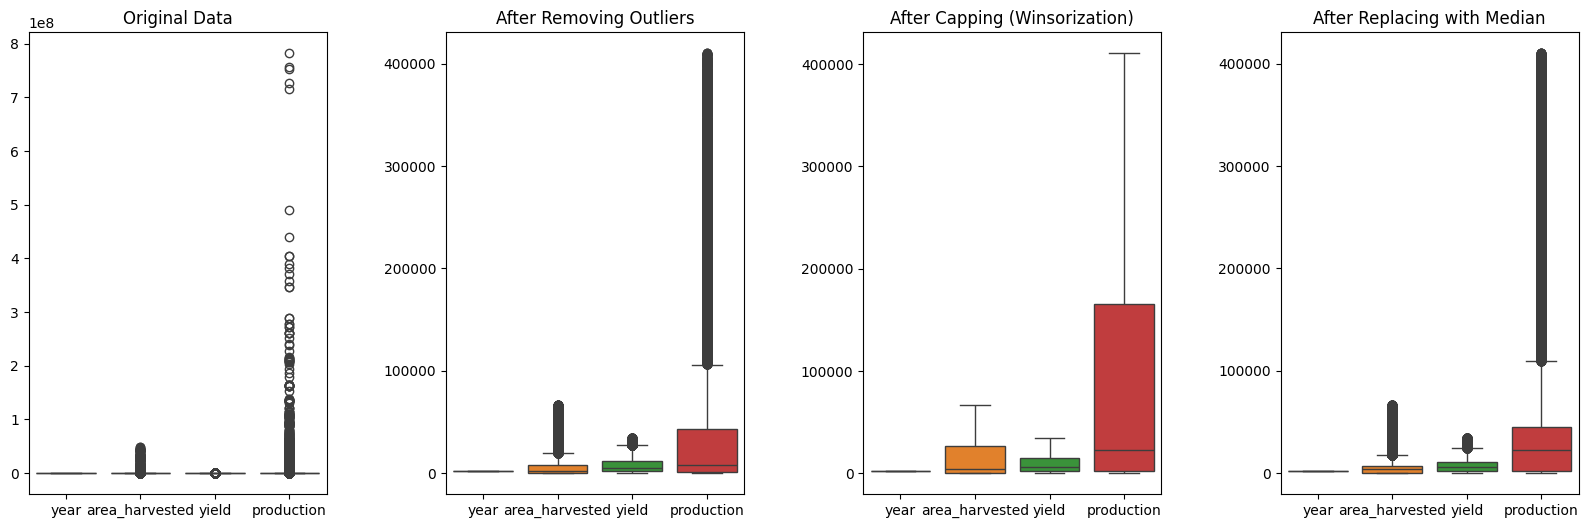

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df4 is your DataFrame
df_numeric = df4.select_dtypes(include=[np.number])  # Select only numeric columns

# Compute Q1, Q3, and IQR
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df_numeric < lower_bound) | (df_numeric > upper_bound))

# Method 1: Remove Outliers
df_removed_outliers = df4[~outliers.any(axis=1)]

# Method 2: Cap Outliers (Winsorization)
df_capped = df4.copy()
df_capped[df_numeric.columns] = df_numeric.clip(lower=lower_bound, upper=upper_bound, axis=1)

# Method 3: Replace Outliers with Median
df_replace_median = df4.copy()
df_replace_median[df_numeric.columns] = df_numeric.mask(outliers, df_numeric.median(), axis=1)

# Plot Box Plots
fig, axes = plt.subplots(1, 4, figsize=(20, 6))
plt.subplots_adjust(wspace=0.4)

# Original Data
sns.boxplot(data=df_numeric, ax=axes[0])
axes[0].set_title("Original Data")

# After Removing Outliers
sns.boxplot(data=df_removed_outliers.select_dtypes(include=[np.number]), ax=axes[1])
axes[1].set_title("After Removing Outliers")

# After Capping (Winsorization)
sns.boxplot(data=df_capped.select_dtypes(include=[np.number]), ax=axes[2])
axes[2].set_title("After Capping (Winsorization)")

# After Replacing Outliers with Median
sns.boxplot(data=df_replace_median.select_dtypes(include=[np.number]), ax=axes[3])
axes[3].set_title("After Replacing with Median")

plt.show()


In [12]:
df_capped.head(55)

,area,item,year,area_harvested,yield,production
0,Afghanistan,"Almonds, in shell",2019,29203.0,1308.3,38205.0000
1,Afghanistan,"Almonds, in shell",2020,22134.0,1775.9,39307.0000
2,Afghanistan,"Almonds, in shell",2021,36862.0,1743.2,64256.0000
3,Afghanistan,"Almonds, in shell",2022,36462.0,1742.0,63515.0000
4,Afghanistan,"Almonds, in shell",2023,37000.0,1810.8,67000.0000
5,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",2019,25293.0,704.1,17807.7600
6,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",2020,25558.0,703.0,17965.9000
7,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",2021,25357.0,705.0,17876.4900
8,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",2022,25403.0,704.0,17883.3800
9,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",2023,25439.0,704.0,17908.5900


In [13]:
df_capped.to_csv("Capped.csv",index=False)

In [14]:
df_capped.columns

Index(['area', 'item', 'year', 'area_harvested', 'yield', 'production'], dtype='object')

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming df_capped is your DataFrame
# df_capped.columns: ['area', 'item', 'year', 'area_harvested', 'yield', 'production']

# Preprocessing
# Ensure the 'year' and 'production' columns are numeric
df_capped['year'] = pd.to_numeric(df_capped['year'], errors='coerce')
df_capped['production'] = pd.to_numeric(df_capped['production'], errors='coerce')

# Drop rows with missing values in production or year
df_capped = df_capped.dropna(subset=['production', 'year'])

# Features: 'area', 'item', 'year', 'area_harvested', 'yield'
# Target: 'production'

# Encode categorical columns ('area', 'item') with one-hot encoding
df_capped = pd.get_dummies(df_capped, columns=['area', 'item'], drop_first=True)

# Define features and target variable
X = df_capped.drop(columns=['production'])
y = df_capped['production']

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Predict the production for the next four years
# Let's predict for the next 4 years (assuming last year is max(df_capped['year']) + 1)
next_years = np.array([df_capped['year'].max() + i for i in range(1, 5)])
next_years_data = pd.DataFrame({
    'year': next_years,
    # Add other necessary feature values based on assumptions or data analysis.
    # Here, we'll use placeholders for 'area', 'item', 'area_harvested', 'yield'
    # You can add relevant values as needed.
    'area': ['Your Area'] * 4,
    'item': ['Your Item'] * 4,
    'area_harvested': [df_capped['area_harvested'].mean()] * 4,  # Placeholder
    'yield': [df_capped['yield'].mean()] * 4  # Placeholder
})

# One-hot encode the new data (same as training data)
next_years_data = pd.get_dummies(next_years_data, columns=['area', 'item'], drop_first=True)

# Predict production for the next four years
next_years_predictions = model.predict(next_years_data)

# Show the predicted production for the next four years
predicted_production_df = pd.DataFrame({
    'year': next_years,
    'predicted_production': next_years_predictions
})

print("\nPredicted Production for the Next Four Years:")
print(predicted_production_df)


Model Evaluation:
Mean Absolute Error (MAE): 51349.43565935801
Mean Squared Error (MSE): 4960339321.542493
R-squared (R2): 0.7900237931414645


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- area_Albania
- area_Algeria
- area_Angola
- area_Antigua and Barbuda
- area_Argentina
- ...


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ensure column names are clean (no leading/trailing spaces)
df_capped.columns = df_capped.columns.str.strip()

# Remove rows with missing values in critical columns
df_capped = df_capped.dropna(subset=['area', 'item', 'production', 'year'])

# Convert categorical columns 'area' and 'item' to dummy variables
df_capped = pd.get_dummies(df_capped, columns=['area', 'item'], drop_first=True)

# Define features (X) and target (y)
X = df_capped.drop(columns=['production'])
y = df_capped['production']

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Predict the production for the next four years
# Let's predict for the next 4 years (assuming last year is max(df_capped['year']) + 1)
next_years = pd.DataFrame({
    'year': [df_capped['year'].max() + i for i in range(1, 5)],
    'area': ['Your Area'] * 4,
    'item': ['Your Item'] * 4,
    'area_harvested': [df_capped['area_harvested'].mean()] * 4,  # Placeholder
    'yield': [df_capped['yield'].mean()] * 4  # Placeholder
})

# One-hot encode the new data (same as training data)
next_years = pd.get_dummies(next_years, columns=['area', 'item'], drop_first=True)

# Predict production for the next four years
future_preds = model.predict(next_years)

# Show the predicted production for the next four years
predicted_production_df = pd.DataFrame({
    'year': next_years['year'],
    'predicted_production': future_preds
})

print("\nPredicted Production for the Next Four Years:")
print(predicted_production_df)


KeyError: ['area', 'item']

In [17]:
df_capped.columns

Index(['year', 'area_harvested', 'yield', 'production', 'area_Albania',
       'area_Algeria', 'area_Angola', 'area_Antigua and Barbuda',
       'area_Argentina', 'area_Armenia',
       ...
       'item_True hemp, raw or retted', 'item_Tung nuts',
       'item_Unmanufactured tobacco', 'item_Vanilla, raw', 'item_Vetches',
       'item_Walnuts, in shell', 'item_Watermelons', 'item_Wheat', 'item_Yams',
       'item_Yautia'],
      dtype='object', length=359)

In [18]:
df_capped

,year,area_harvested,yield,production,area_Albania,area_Algeria,area_Angola,area_Antigua and Barbuda,area_Argentina,area_Armenia,...,"item_True hemp, raw or retted",item_Tung nuts,item_Unmanufactured tobacco,"item_Vanilla, raw",item_Vetches,"item_Walnuts, in shell",item_Watermelons,item_Wheat,item_Yams,item_Yautia
0,2019,29203.0,1308.3,38205.00,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2020,22134.0,1775.9,39307.00,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2021,36862.0,1743.2,64256.00,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2022,36462.0,1742.0,63515.00,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2023,37000.0,1810.8,67000.00,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92417,2019,23.0,423.8,9.88,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
92418,2020,23.0,430.3,9.93,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
92419,2021,23.0,426.4,9.92,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
92420,2022,23.0,426.8,9.91,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [19]:
df_capped.to_csv("capped.csv",index=False)

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ensure column names are clean (no leading/trailing spaces)
df_capped.columns = df_capped.columns.str.strip()

# Remove rows with missing values in critical columns: production, year, and area_harvested, yield
df_capped = df_capped.dropna(subset=['production', 'year', 'area_harvested', 'yield'])

# Now, we can directly use the DataFrame since area and item columns are already encoded.
# Define features (X) and target (y)
X = df_capped.drop(columns=['production'])
y = df_capped['production']

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Predict the production for the next four years
# Let's predict for the next 4 years (assuming last year is max(df_capped['year']) + 1)
next_years = pd.DataFrame({
    'year': [df_capped['year'].max() + i for i in range(1, 5)],
    'area_harvested': [df_capped['area_harvested'].mean()] * 4,  # Placeholder
    'yield': [df_capped['yield'].mean()] * 4  # Placeholder
})

# Add the dummy variables for 'area' and 'item' (assuming they were already one-hot encoded)
# For the future data, create dummies for 'area' and 'item' just like the training data
next_years = pd.get_dummies(next_years, columns=['area', 'item'], drop_first=True)

# Predict production for the next four years
future_preds = model.predict(next_years)

# Show the predicted production for the next four years
predicted_production_df = pd.DataFrame({
    'year': next_years['year'],
    'predicted_production': future_preds
})

print("\nPredicted Production for the Next Four Years:")
print(predicted_production_df)


Model Evaluation:
Mean Absolute Error (MAE): 4668.510883337504
Mean Squared Error (MSE): 615208478.8687595
R-squared (R²): 0.9739575995821388


KeyError: "None of [Index(['area', 'item'], dtype='object')] are in the [columns]"

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ensure column names are clean
df_capped.columns = df_capped.columns.str.strip()

# Remove missing values from important columns
df_capped = df_capped.dropna(subset=['production', 'year', 'area_harvested', 'yield'])

# Features (X) and target (y)
X = df_capped.drop(columns=['production'])
y = df_capped['production']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions on test set
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# **Predict Future Production (2024-2027)**
# Prepare future years data (use average values for numerical features)
future_years = [df_capped['year'].max() + i for i in range(1, 5)]
future_data = pd.DataFrame({
    'year': future_years,
    'area_harvested': [df_capped['area_harvested'].mean()] * 4,
    'yield': [df_capped['yield'].mean()] * 4
})

# Add missing dummy variables (set all to 0)
for col in X.columns:
    if col not in future_data.columns:
        future_data[col] = 0  # Set all categorical columns to 0 as placeholders

# Reorder columns to match training data
future_data = future_data[X.columns]

# Predict future production
future_preds = model.predict(future_data)

# Display results
predicted_production_df = pd.DataFrame({'year': future_years, 'predicted_production': future_preds})
print("\nPredicted Production for the Next Four Years:")
print(predicted_production_df)


Model Evaluation:
Mean Absolute Error (MAE): 4668.510883337504
Mean Squared Error (MSE): 615208478.8687595
R-squared (R²): 0.9739575995821388


C:\Users\aswin\AppData\Local\Temp\ipykernel_9112\1764216560.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_data[col] = 0  # Set all categorical columns to 0 as placeholders
C:\Users\aswin\AppData\Local\Temp\ipykernel_9112\1764216560.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_data[col] = 0  # Set all categorical columns to 0 as placeholders
C:\Users\aswin\AppData\Local\Temp\ipykernel_9112\1764216560.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fra


Predicted Production for the Next Four Years:
   year  predicted_production
0  2024              188300.0
1  2025              188300.0
2  2026              188300.0
3  2027              188300.0


In [24]:
print(df_capped)


       year  area_harvested   yield  production  area_Albania  area_Algeria  \
0      2019         29203.0  1308.3    38205.00         False         False   
1      2020         22134.0  1775.9    39307.00         False         False   
2      2021         36862.0  1743.2    64256.00         False         False   
3      2022         36462.0  1742.0    63515.00         False         False   
4      2023         37000.0  1810.8    67000.00         False         False   
...     ...             ...     ...         ...           ...           ...   
92417  2019            23.0   423.8        9.88         False         False   
92418  2020            23.0   430.3        9.93         False         False   
92419  2021            23.0   426.4        9.92         False         False   
92420  2022            23.0   426.8        9.91         False         False   
92421  2023            23.0   427.8        9.92         False         False   

       area_Angola  area_Antigua and Barbuda  area_

In [27]:
import pandas as pd
df7=pd.read_csv(r"C:\Users\aswin\3D Objects\guvi_project\project-3 (crops_agriculture)\Capped.csv")

In [28]:
df7.columns

Index(['year', 'area_harvested', 'yield', 'production', 'area_Albania',
       'area_Algeria', 'area_Angola', 'area_Antigua and Barbuda',
       'area_Argentina', 'area_Armenia',
       ...
       'item_True hemp, raw or retted', 'item_Tung nuts',
       'item_Unmanufactured tobacco', 'item_Vanilla, raw', 'item_Vetches',
       'item_Walnuts, in shell', 'item_Watermelons', 'item_Wheat', 'item_Yams',
       'item_Yautia'],
      dtype='object', length=359)

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming your DataFrame is already prepared
df_capped = df_capped.dropna(subset=['production', 'year', 'area_harvested', 'yield'])

# Features (X) and target (y)
X = df_capped.drop(columns=['production'])
y = df_capped['production']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions on test set
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# ------------------- Future Prediction (2024-2027) ------------------- #

# Calculate yearly trends for 'area_harvested' and 'yield'
yearly_trends = df_capped.groupby('year')[['area_harvested', 'yield']].mean()
area_harvested_slope = np.polyfit(yearly_trends.index, yearly_trends['area_harvested'], 1)[0]
yield_slope = np.polyfit(yearly_trends.index, yearly_trends['yield'], 1)[0]

# Prepare future data
future_years = [df_capped['year'].max() + i for i in range(1, 5)]
future_data = pd.DataFrame({
    'year': future_years,
    'area_harvested': [df_capped['area_harvested'].mean() + (i * area_harvested_slope) for i in range(1, 5)],
    'yield': [df_capped['yield'].mean() + (i * yield_slope) for i in range(1, 5)]
})

# Add missing dummy variables (set all to 0)
for col in X.columns:
    if col not in future_data.columns:
        future_data[col] = 0  # Set to 0 by default

# Reorder columns to match training data
future_data = future_data[X.columns]

# Predict future production
future_preds = model.predict(future_data)

# Display results
predicted_production_df = pd.DataFrame({'year': future_years, 'predicted_production': future_preds})
print("\nPredicted Production for the Next Four Years:")
print(predicted_production_df)


Model Evaluation:
Mean Absolute Error (MAE): 4668.510883337504
Mean Squared Error (MSE): 615208478.8687595
R-squared (R²): 0.9739575995821388


C:\Users\aswin\AppData\Local\Temp\ipykernel_9112\1654124931.py:52: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_data[col] = 0  # Set to 0 by default
C:\Users\aswin\AppData\Local\Temp\ipykernel_9112\1654124931.py:52: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_data[col] = 0  # Set to 0 by default
C:\Users\aswin\AppData\Local\Temp\ipykernel_9112\1654124931.py:52: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consid


Predicted Production for the Next Four Years:
   year  predicted_production
0  2024              188300.0
1  2025              188300.0
2  2026              188300.0
3  2027              180612.0


In [30]:
# Create a DataFrame for future predictions
predicted_production_df = pd.DataFrame({
    'year': future_years,
    'area_harvested': future_data['area_harvested'],  # Use predicted area_harvested values
    'yield': future_data['yield'],  # Use predicted yield values
    'production': future_preds  # Predicted production values
})

# Add future predictions to the existing DataFrame
df_final = pd.concat([df_capped, predicted_production_df], ignore_index=True)

# Display the updated DataFrame
print(df_final.tail(10))  # Shows last 10 rows including new predictions


       year  area_harvested         yield  production area_Albania  \
44821  2023    66716.000000    307.100000    40363.31        False   
44822  2019       23.000000    423.800000        9.88        False   
44823  2020       23.000000    430.300000        9.93        False   
44824  2021       23.000000    426.400000        9.92        False   
44825  2022       23.000000    426.800000        9.91        False   
44826  2023       23.000000    427.800000        9.92        False   
44827  2024    17903.780099   9987.664523   188300.00          NaN   
44828  2025    17884.760234  10007.956998   188300.00          NaN   
44829  2026    17865.740368  10028.249474   188300.00          NaN   
44830  2027    17846.720503  10048.541949   180612.00          NaN   

      area_Algeria area_Angola area_Antigua and Barbuda area_Argentina  \
44821        False       False                    False          False   
44822        False       False                    False          False   
44823  

In [31]:
df_final.columns

Index(['year', 'area_harvested', 'yield', 'production', 'area_Albania',
       'area_Algeria', 'area_Angola', 'area_Antigua and Barbuda',
       'area_Argentina', 'area_Armenia',
       ...
       'item_True hemp, raw or retted', 'item_Tung nuts',
       'item_Unmanufactured tobacco', 'item_Vanilla, raw', 'item_Vetches',
       'item_Walnuts, in shell', 'item_Watermelons', 'item_Wheat', 'item_Yams',
       'item_Yautia'],
      dtype='object', length=359)

In [32]:
df5=df_final[['year', 'area_harvested', 'yield', 'production']]
df5

,year,area_harvested,yield,production
0,2019,29203.000000,1308.300000,38205.00
1,2020,22134.000000,1775.900000,39307.00
2,2021,36862.000000,1743.200000,64256.00
3,2022,36462.000000,1742.000000,63515.00
4,2023,37000.000000,1810.800000,67000.00
...,...,...,...,...
44826,2023,23.000000,427.800000,9.92
44827,2024,17903.780099,9987.664523,188300.00
44828,2025,17884.760234,10007.956998,188300.00
44829,2026,17865.740368,10028.249474,188300.00


In [33]:
df5.to_csv("FINAL.CSV",index=False)

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
df = pd.read_csv(r"C:\Users\aswin\3D Objects\guvi_project\project-3 (crops_agriculture)\capped.csv")
df.columns = df.columns.str.strip()

# User input for filtering
country_to_filter = input("Enter the country or num for items to filter: ")

if country_to_filter.isdigit():
    item_to_filter = input("Enter the item to filter: ")
    filtered_data = df[df["item"] == item_to_filter]
else:
    filtered_data = df[df["area"] == country_to_filter]

print("\nFiltered Data")
print(filtered_data)

# Clean data
df_capped = filtered_data.dropna(subset=['production', 'year', 'area_harvested', 'yield'])

# Define X, Y
X = df_capped.drop(columns=["production"])
Y = df_capped["production"]

# One-hot encoding for categorical variables
X = pd.get_dummies(X, columns=["area", "item"], drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Use Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Train Predictions
y_pred = model.predict(X_train)

# Evaluation
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print("\nEvaluation Metrics")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score: {r2}")

# Predict for the next 2 years
future_years = [df_capped["year"].max() + i for i in range(1, 3)]

# Apply a fixed growth rate
fixed_growth_rate = 0.02
fluctuation_range = 0.05

prev_area = df_capped["area_harvested"].iloc[-1]
prev_yield = df_capped["yield"].iloc[-1]

area_growth = []
yield_growth = []

growth_rates = [fixed_growth_rate, fixed_growth_rate + 0.05] 

for i in range(2):  
    year_fluctuation = np.random.uniform(-fluctuation_range, fluctuation_range)
    prev_area *= (1 + growth_rates[i] + year_fluctuation)
    prev_yield *= (1 + growth_rates[i] + year_fluctuation)
    
    area_growth.append(prev_area)
    yield_growth.append(prev_yield)

# Create future dataset
next_years = pd.DataFrame({
    "year": future_years,
    "area_harvested": area_growth,
    "yield": yield_growth
})

# Ensure categorical feature consistency
for col in X.columns:
    if col not in next_years:
        next_years[col] = X_train[col].mode()[0]  

# Ensure column order matches training data
next_years = next_years[X.columns]

# Predict future production
future_preds = model.predict(next_years)

# Display future predictions
print("\nFuture Predictions for Next 2 Years")
for year, preds in zip(future_years, future_preds):
    print(f"Year: {year}, Predicted Production: {preds:.2f}")

KeyError: 'area'